# Execução do notebook de pre-processamento

Essa execução irá carregar aqui todas as importações e variaveis de ambiente criadas no notebook **preprocessing.ipynb**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

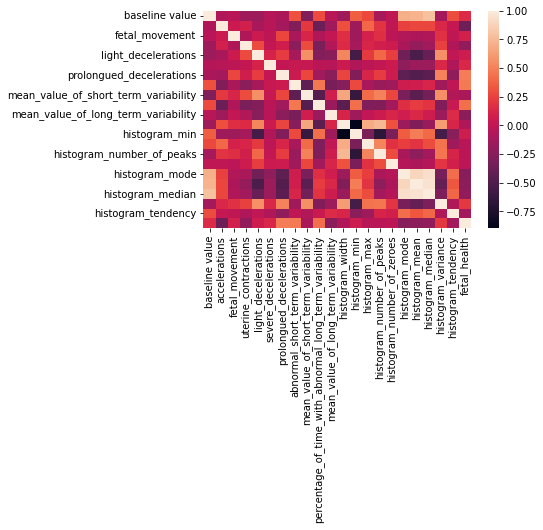

In [1]:
%run preprocessing.ipynb

In [2]:
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

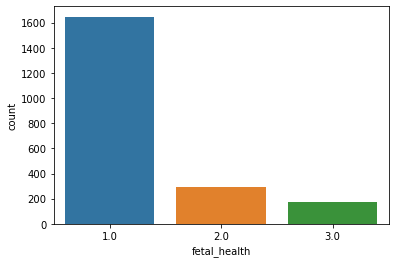

In [4]:
sns.countplot(data=fetal_health, x="fetal_health");

In [5]:
y.value_counts(normalize=True)

1.0    0.778987
2.0    0.138192
3.0    0.082821
Name: fetal_health, dtype: float64

In [6]:
fetal_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

### Legenda:

1 - Normal

2 - Suspeito

3 - Patologico (positivo)

#### Observação importante: Os dados estão bem desbalanceados, mas tendo em vista que o desbalanciamento é exatamente o replexo do cenário atual, onde temos mais fetos normais que suspeitos ou patologico

In [7]:
fetal_health_corr = fetal_health.corr().abs().fetal_health
cols_drops = (fetal_health_corr[fetal_health_corr < 0.08]).index
cols_drops

Index(['light_decelerations', 'histogram_width', 'histogram_min',
       'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes'],
      dtype='object')

In [9]:
X_train.drop(columns=cols_drops, inplace=True)
X_test.drop(columns=cols_drops, inplace=True)

## Usando o Min Max Scaler / Robust Scaler

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import make_scorer, f1_score, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

steps_mms = [
    #("mms", MinMaxScaler()),
    ("rs", RobustScaler()),
    ("knn", KNeighborsClassifier()),
]

pipe_mms = Pipeline(steps_mms)

In [32]:
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

score = make_scorer(recall_score, labels=[2, 3], average="micro")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(20, 40)}

grid_knn_mms = GridSearchCV(estimator=pipe_mms, 
                            param_grid=param_grid,
                            scoring=score,
                            cv=splitter,
                            verbose=10,
                            n_jobs=-1)

grid_knn_mms.fit(X_train, y_train)

Fitting 10 folds for each of 152 candidates, totalling 1520 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rs', RobustScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 40),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, labels=[2, 3], average=micro),
             verbose=10)

In [33]:
grid_knn_mms.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 4, 'knn__weights': 'distance'}

In [34]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1316
         2.0       1.00      0.99      1.00       234
         3.0       1.00      1.00      1.00       140

    accuracy                           1.00      1690
   macro avg       1.00      1.00      1.00      1690
weighted avg       1.00      1.00      1.00      1690



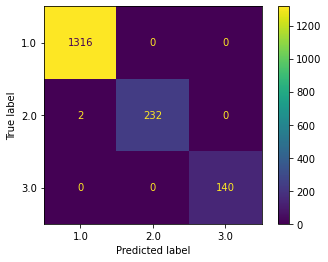

In [41]:
print_report(grid_knn_mms, X_train, y_train)

              precision    recall  f1-score   support

         1.0       0.91      0.98      0.94       330
         2.0       0.74      0.50      0.60        58
         3.0       0.87      0.77      0.82        35

    accuracy                           0.89       423
   macro avg       0.84      0.75      0.79       423
weighted avg       0.89      0.89      0.89       423



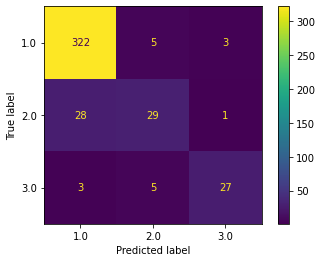

In [43]:
print_report(grid_knn_r2, X_test, y_test)

#### R2

In [38]:
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

score = "r2"

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(20, 40)}

grid_knn_r2 = GridSearchCV(estimator=pipe_mms, 
                            param_grid=param_grid,
                            scoring=score,
                            cv=splitter,
                            verbose=10,
                            n_jobs=-1)

grid_knn_r2.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rs', RobustScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(20, 40),
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=10)

In [39]:
grid_knn_r2.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 26,
 'knn__weights': 'distance'}

#### Accuracy

In [42]:
from sklearn.metrics import accuracy_score

splitter = KFold(n_splits=10, shuffle=True, random_state=42)

score = make_scorer(accuracy_score)

# ====================

param_grid = {"knn__weights" : ['uniform', 'distance'],
              "knn__algorithm" : ['ball_tree', 'brute', 'kd_tree'],
              "knn__metric" : ['manhattan', 'euclidean'],
              "knn__n_neighbors" : range(20, 40)}

grid_knn_acc = GridSearchCV(estimator=pipe_mms, 
                            param_grid=param_grid,
                            scoring=score,
                            cv=splitter,
                            verbose=10,
                            n_jobs=-1)

grid_knn_acc.fit(X_train, y_train) 

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rs', RobustScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['ball_tree', 'brute', 'kd_tree'],
                         'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(20, 40),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(accuracy_score), verbose=10)

In [44]:
grid_knn_acc.best_params_

{'knn__algorithm': 'ball_tree',
 'knn__metric': 'manhattan',
 'knn__n_neighbors': 26,
 'knn__weights': 'distance'}

              precision    recall  f1-score   support

         1.0       0.91      0.98      0.94       330
         2.0       0.74      0.50      0.60        58
         3.0       0.87      0.77      0.82        35

    accuracy                           0.89       423
   macro avg       0.84      0.75      0.79       423
weighted avg       0.89      0.89      0.89       423



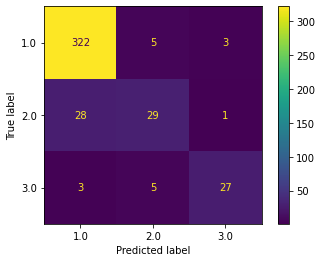

In [45]:
print_report(grid_knn_acc, X_test, y_test)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1316
         2.0       1.00      0.99      1.00       234
         3.0       1.00      1.00      1.00       140

    accuracy                           1.00      1690
   macro avg       1.00      1.00      1.00      1690
weighted avg       1.00      1.00      1.00      1690



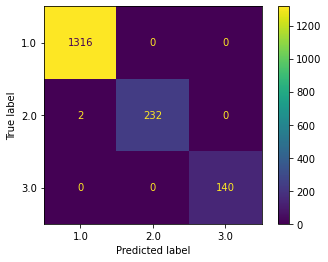

In [46]:
print_report(grid_knn_acc, X_train, y_train)

### Metricas:

- Usando o MMS o resultado de accuracy variou entre 91 no teste e 100 no treino, com excessão do f1, que apresentou 95 no treino:

r2 = test 91 / train 100

f1 = test 91 / train 95

Accuracy = test 91 / train 100

Recall = test 91 / train 100

- Ja com o uso do RS o resultado foi inferior e variou entre 89 no teste e 100 no treino

## Usando o Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import make_scorer, f1_score, r2_score

steps_1 = [
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier()),
]

pipe_1 = Pipeline(steps_1)

In [ ]:
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, labels=[2, 3], average='micro')


param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(20, 40)}


grid_knn = GridSearchCV(estimator=pipe_1, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

In [ ]:
grid_knn.best_estimator_

In [ ]:
print_report(grid_knn, X_test, y_test)

In [ ]:
print_report(grid_knn, X_train, y_train)

In [ ]:
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)


param_grid = {"knn__weights" : ['uniform', 'distance'],
              "knn__algorithm" : ['ball_tree', 'brute', 'kd_tree'],
              "knn__metric" : ['manhattan', 'euclidean'],
              "knn__n_neighbors" : range(20, 40)}


grid_knn_ssac = GridSearchCV(estimator=pipe_1, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn_ssac.fit(X_train, y_train)

In [ ]:
grid_knn_ssac.best_estimator_

In [ ]:
print_report(grid_knn_ssac, X_train, y_train)

In [ ]:
print_report(grid_knn_ssac, X_test, y_test)

Em resumo, o modelo sofre de overfitting pois se adaptou muito bem aos dados com os quais está sendo treinado; porém, não generaliza bem para novos dados. Ou seja, o modelo “decorou” o conjunto de dados de treino, mas não aprendeu de fato o que diferencia aqueles dados para quando precisar enfrentar novos testes. Mesmo alterando o range, as metricas e o scaller não temos resolução pra isso. 

#### Não atendeu.